In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
population = pd.read_csv('C:/Users/orlya/Desktop/projet 4/ici/population.csv')


In [34]:
population.head

<bound method NDFrame.head of              Zone  Année     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]>

In [35]:
population.shape

(1416, 3)

In [36]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000


In [37]:
population['Valeur'] = ((population['Valeur'])*1000)

In [38]:
population.head

<bound method NDFrame.head of              Zone  Année      Valeur
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]>

In [39]:
population = population.rename(columns = {'Valeur' : 'Nb_habitants'})

In [40]:
population.head

<bound method NDFrame.head of              Zone  Année  Nb_habitants
0     Afghanistan   2013    32269589.0
1     Afghanistan   2014    33370794.0
2     Afghanistan   2015    34413603.0
3     Afghanistan   2016    35383032.0
4     Afghanistan   2017    36296113.0
...           ...    ...           ...
1411     Zimbabwe   2014    13586707.0
1412     Zimbabwe   2015    13814629.0
1413     Zimbabwe   2016    14030331.0
1414     Zimbabwe   2017    14236595.0
1415     Zimbabwe   2018    14438802.0

[1416 rows x 3 columns]>

In [41]:
# convertir la colonne année en format object
population['Année'] = population['Année'].astype(str)
# filtrer "population" sur l'année 2017
population_2017 = population[population['Année']== '2017']
population_2017.head()

,Zone,Année,Nb_habitants
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [42]:
# preparer fichier disponibilité alimentaire

In [43]:
dispo_alimentaire = pd.read_csv('C:/Users/orlya/Desktop/projet 4/ici/dispo_alimentaire.csv')

In [44]:
dispo_alimentaire.head

<bound method NDFrame.head of                Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    NaN   
1       Afghanistan        Agrumes, Autres  vegetale                    NaN   
2       Afghanistan  Aliments pour enfants  vegetale                    NaN   
3       Afghanistan                 Ananas  vegetale                    NaN   
4       Afghanistan                Bananes  vegetale                    NaN   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    NaN   
15601  Îles Salomon    Viande de Volailles   animale                    NaN   
15602  Îles Salomon          Viande, Autre   animale                    NaN   
15603  Îles Salomon                    Vin  vegetale                    NaN   
15604  Îles Salomon         Épices, Autres  vegetale                    NaN   

       Autres Utilisa

In [45]:
# Remplacer les valeurs manquantes par des zéro
dispo_alimentaire.fillna(0, inplace=True)
dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# grouper par zone
dispo_alimentaire_zone = dispo_alimentaire.groupby('Zone').sum()
dispo_alimentaire_zone.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


In [47]:
dispo_alimentaire_zone.dtypes


Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                                           float64
Production                                                       float64
Semences                                                         float64
Traitement                                         

In [48]:
li = ['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']

for i in li:
    dispo_alimentaire_zone[i] = dispo_alimentaire_zone[i]*1000000
    print(i)



Aliments pour animaux
Autres Utilisations
Disponibilité intérieure
Disponibilité intérieure
Exportations - Quantité
Importations - Quantité
Nourriture
Pertes
Production
Semences
Traitement
Variation de stock


In [472]:
# preparer fichier sous_nutrition

In [473]:
sous_nutrition = pd.read_csv('C:/Users/orlya/Desktop/projet 4/ici/sous_nutrition.csv')

In [474]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [475]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [476]:
# filtrer le fichier "sous_nutrition" sur la période 2016-2018
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année']== '2016-2018']
# remplacer dans le fichier "sous_nutrition" sur la valeur "2016-2018" par "2017"
sous_nutrition_2017  = sous_nutrition_2017.replace(to_replace = '2016-2018', value = '2017')
sous_nutrition_2017.tail(50)

,Zone,Année,Valeur
922,République de Moldova,2017,NaN
928,République démocratique du Congo,2017,NaN
934,République démocratique populaire lao,2017,NaN
940,République dominicaine,2017,0.6
946,République populaire démocratique de Corée,2017,12
952,République-Unie de Tanzanie,2017,13.4
958,Roumanie,2017,NaN
964,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,NaN
970,Rwanda,2017,4.2
976,Sainte-Lucie,2017,NaN


In [477]:
sous_nutrition_2017 = sous_nutrition_2017.replace(to_replace = '<0.1', value = '0.05')
sous_nutrition_2017.tail(50)

,Zone,Année,Valeur
922,République de Moldova,2017,NaN
928,République démocratique du Congo,2017,NaN
934,République démocratique populaire lao,2017,NaN
940,République dominicaine,2017,0.6
946,République populaire démocratique de Corée,2017,12
952,République-Unie de Tanzanie,2017,13.4
958,Roumanie,2017,NaN
964,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,NaN
970,Rwanda,2017,4.2
976,Sainte-Lucie,2017,NaN


In [478]:
# convertir la colonne "Valeur" en format numérique
sous_nutrition_2017['Valeur'] = pd.to_numeric(sous_nutrition_2017['Valeur'], errors='coerce')
sous_nutrition_2017.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [479]:
sous_nutrition_2017['Valeur'] = sous_nutrition_2017['Valeur']*1000000

In [480]:
# remplacer les valeurs manquantes par un zéro
sous_nutrition_2017.fillna(0, inplace=True)
sous_nutrition_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0


In [481]:
# renommer la colonne valeur
sous_nutrition_2017 = sous_nutrition_2017.rename(columns = {'Valeur' : 'Nb_habitants_en_sous_nutrition'})
sous_nutrition_2017.head()

,Zone,Année,Nb_habitants_en_sous_nutrition
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0


In [482]:
sous_nutrition_2017.dtypes

Zone                               object
Année                              object
Nb_habitants_en_sous_nutrition    float64
dtype: object

In [483]:
#  fichier aide alimentaire

In [484]:
aide_alimentaire = pd.read_csv('C:/Users/orlya/Desktop/projet 4/ici/aide_alimentaire.csv')

In [485]:
aide_alimentaire.head

<bound method NDFrame.head of      Pays bénéficiaire  Année                   Produit  Valeur
0          Afghanistan   2013       Autres non-céréales     682
1          Afghanistan   2014       Autres non-céréales     335
2          Afghanistan   2013              Blé et Farin   39224
3          Afghanistan   2014              Blé et Farin   15160
4          Afghanistan   2013                  Céréales   40504
...                ...    ...                       ...     ...
1470          Zimbabwe   2015  Mélanges et préparations      96
1471          Zimbabwe   2013              Non-céréales    5022
1472          Zimbabwe   2014              Non-céréales    2310
1473          Zimbabwe   2015              Non-céréales     306
1474          Zimbabwe   2013                Riz, total      64

[1475 rows x 4 columns]>

In [486]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [487]:
# conversion du fichier "aide_alimentaire" en format string
aide_alimentaire = aide_alimentaire.astype(str)

In [488]:
# filtrer sur les pays recevant des aides depuis 2013
aide_alimentaire_2013 = aide_alimentaire[aide_alimentaire['Année']== '2013']
aide_alimentaire_2013.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087


In [489]:
# Renommer "Pays bénéficiaire" en "Zone"
aide_alimentaire_2013 = aide_alimentaire_2013.rename(columns = {'Pays bénéficiaire' : 'Zone'})
# convertir en format numérique
aide_alimentaire_2013['Valeur'] = pd.to_numeric(aide_alimentaire_2013['Valeur'],errors= 'coerce')

In [490]:
# grouper par zone
aide_alimentaire_2013 = aide_alimentaire_2013.groupby('Zone').sum()
aide_alimentaire_2013.head()

,Valeur
Zone,
Afghanistan,128238
Algérie,35234
Angola,5000
Bangladesh,131018
Bhoutan,1724


In [491]:
# convertir en kg
aide_alimentaire_2013['Valeur'] = ((aide_alimentaire_2013['Valeur'])*1000)

In [492]:
# Renommer "Valeur" en "Aides_en_kg"
aide_alimentaire_2013 = aide_alimentaire_2013.rename(columns = {'Valeur' : 'Aides_en_kg'})
aide_alimentaire_2013.head()

,Aides_en_kg
Zone,
Afghanistan,128238000
Algérie,35234000
Angola,5000000
Bangladesh,131018000
Bhoutan,1724000


In [493]:
## demande de marc
# Question 1 - Proportion de personnes en sous-nutrition

In [494]:
# Jointure entre les fichiers "population_2017" et "sous_nutrition_2017"
fusion_sous_nutrition_pop_2017 = pd.merge(population_2017, sous_nutrition_2017, how="left", left_on="Zone", right_on="Zone")
fusion_sous_nutrition_pop_2017.head()

,Zone,Année_x,Nb_habitants,Année_y,Nb_habitants_en_sous_nutrition
0,Afghanistan,2017,36296113.0,2017,10500000.0
1,Afrique du Sud,2017,57009756.0,2017,3100000.0
2,Albanie,2017,2884169.0,2017,100000.0
3,Algérie,2017,41389189.0,2017,1300000.0
4,Allemagne,2017,82658409.0,2017,0.0


In [495]:
fusion_sous_nutrition_pop_2017['%pop_sous_nutrition'] = (((fusion_sous_nutrition_pop_2017['Nb_habitants_en_sous_nutrition'])/fusion_sous_nutrition_pop_2017['Nb_habitants'])*100)
fusion_sous_nutrition_pop_2017.head()

,Zone,Année_x,Nb_habitants,Année_y,Nb_habitants_en_sous_nutrition,%pop_sous_nutrition
0,Afghanistan,2017,36296113.0,2017,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,2017,3100000.0,5.437666
2,Albanie,2017,2884169.0,2017,100000.0,3.467203
3,Algérie,2017,41389189.0,2017,1300000.0,3.140917
4,Allemagne,2017,82658409.0,2017,0.0,0.000000


In [496]:
pourcentage = fusion_sous_nutrition_pop_2017['%pop_sous_nutrition'].mean()
pourcentage = round(pourcentage,1)
print("La moyenne de la population en sous-nutrition est de ", pourcentage, "%")

La moyenne de la population en sous-nutrition est de  7.5 %


In [497]:
total_sous_nutrition = fusion_sous_nutrition_pop_2017['Nb_habitants_en_sous_nutrition'].sum()
population_totale = fusion_sous_nutrition_pop_2017['Nb_habitants'].sum()
proportion = total_sous_nutrition/population_totale*100
print(proportion)

7.11036651055073


In [498]:
population_totale = fusion_sous_nutrition_pop_2017['Nb_habitants'].sum()
print(population_totale)

7548134111.0


In [499]:
total_sous_nutrition = fusion_sous_nutrition_pop_2017['Nb_habitants_en_sous_nutrition'].sum()
print(total_sous_nutrition)

536700000.0


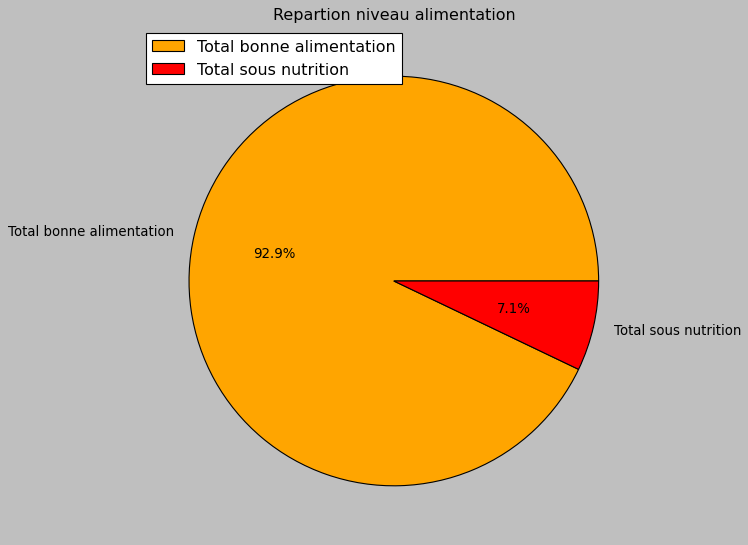

In [500]:
plt.figure(figsize=(10,8))
plt.style.use('classic')
labels = 'Total bonne alimentation', 'Total sous nutrition'
sizes = [92.9, 7.10]
colors = ['orange',  'red']
explode = [0.15,0]
#plt.pie(sizes, labels=labels, colors=colors, 
        #autopct='%1.1f%%', explode = explode, shadow=True, startangle=45)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Repartion niveau alimentation')
plt.legend( loc = 2)
plt.savefig('repartitionpop')
plt.show()

In [501]:
# Question 2 - Le nombre théorique de personnes qui pourraient être nourries avec la disponibilité alimentaire

In [502]:
fusion_dispo_alimentaire_pop_2017 = pd.merge(dispo_alimentaire, population_2017, how="left", left_on="Zone", right_on="Zone")
fusion_dispo_alimentaire_pop_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [503]:
fusion_dispo_alimentaire_pop_2017.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [504]:
fusion_dispo_alimentaire_pop_2017['dispo_kcal'] = fusion_dispo_alimentaire_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * fusion_dispo_alimentaire_pop_2017['Nb_habitants'] * 365
print(" La disponibilité alimentaire totale en kcal est de :", fusion_dispo_alimentaire_pop_2017['dispo_kcal'].sum(), "kcal")

 La disponibilité alimentaire totale en kcal est de : 7635429388975815.0 kcal


In [505]:
# Avec un apport journalier moyen de 2500 kcal
total = round(fusion_dispo_alimentaire_pop_2017['dispo_kcal'].sum()/(2500*365),2)
print(" Le nombre théorique de personnes qui pourraient être nourries avec la disponibilité alimentaire est de: ", total)

 Le nombre théorique de personnes qui pourraient être nourries avec la disponibilité alimentaire est de:  8367593850.93


In [506]:
proportion = (total/population_totale)*100 

In [507]:
print( 'avec la disponibilité interieur on pourrai nourri',proportion, 'de la population mondiale')

avec la disponibilité interieur on pourrai nourri 110.85645442806576 de la population mondiale


In [508]:
# Question 3 - Le nombre théorique de personnes qui pourraient être nourries UNIQUEMENT avec la disponibilité alimentaire VEGETALE

In [509]:
dispo_alimentaire_vegetale = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']

In [510]:
dispo_alimentaire_vegetale_zone = dispo_alimentaire_vegetale.groupby('Zone').sum()
dispo_alimentaire_vegetale_zone.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0


In [511]:
fusion_dispo_alimentaire_vegetale_zone_pop_2017 = pd.merge(dispo_alimentaire_vegetale_zone, population_2017, how="left", left_on="Zone", right_on="Zone")
fusion_dispo_alimentaire_vegetale_zone_pop_2017.head(5)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296113.0
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009756.0
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884169.0
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389189.0
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658409.0


In [512]:
fusion_dispo_alimentaire_vegetale_zone_pop_2017['dispo_kcal_vegetale'] = fusion_dispo_alimentaire_vegetale_zone_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * fusion_dispo_alimentaire_vegetale_zone_pop_2017['Nb_habitants'] * 365
print(" La disponibilité végétale totale en kcal est de :", fusion_dispo_alimentaire_vegetale_zone_pop_2017['dispo_kcal_vegetale'].sum()/(2500*365), "Nbhabitant")

 La disponibilité végétale totale en kcal est de : 6904305684.6004 Nbhabitant


In [513]:
# Question 4 - Part de la dispo intérieure consacrée à l'alimentation humaine, animale et aux pertes


In [514]:
disponibilité_intérieure = fusion_dispo_alimentaire_pop_2017['Disponibilité intérieure'].sum()

for elt in ['Aliments pour animaux','Pertes', 'Nourriture','Semences', 'Autres Utilisations', 'Traitement']:
     print("Proportion de", elt, ":", "{:.2f}".format(fusion_dispo_alimentaire_pop_2017[elt].sum()*100/disponibilité_intérieure), "%")

Proportion de Aliments pour animaux : 13.24 %
Proportion de Pertes : 4.61 %
Proportion de Nourriture : 49.51 %
Proportion de Semences : 1.57 %
Proportion de Autres Utilisations : 8.78 %
Proportion de Traitement : 22.38 %


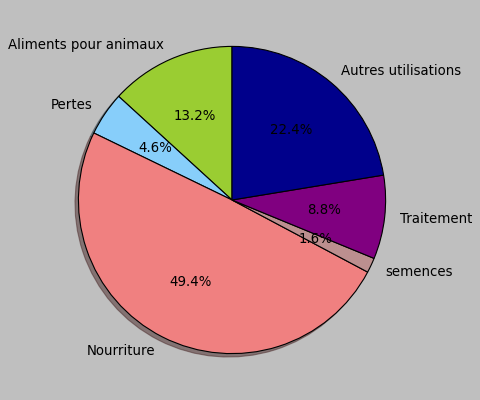

In [515]:
labels = 'Aliments pour animaux', 'Pertes', 'Nourriture', 'semences','Traitement', 'Autres utilisations'
sizes = [13.24, 4.61, 49.51, 1.57, 8.82, 22.45]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','rosybrown', 'purple', 'darkblue']
plt.pie(sizes, labels=labels, colors = colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('PieChart01.png')
plt.show()

In [516]:
#La liste des céréales est disponible sur le site de la FAO dans la partie "Bilans alimentaires (2013, ancienne méthodologie et population)", en sélectionnant le groupe de produits "Céréales - Excl Bière >(Liste)" :

liste_cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

In [517]:
fusion_dispo_alimentaire_pop_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10


In [518]:
cereales = fusion_dispo_alimentaire_pop_2017.loc[fusion_dispo_alimentaire_pop_2017['Produit'].isin(liste_cereales),:]
cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,...,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0,2017,36296113.0,1.813662e+13
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,...,1.0,76.0,31.0,312.0,5.0,0.0,0.0,2017,36296113.0,2.782097e+11
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,...,0.0,12.0,1.0,13.0,0.0,0.0,0.0,2017,36296113.0,3.974424e+10
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,...,10.0,89.0,52.0,514.0,22.0,0.0,0.0,2017,36296113.0,3.444501e+11


In [519]:
print(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum())

36.291456706047654


In [520]:
print(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum())

42.75074480712289


In [521]:
# Analyse de la Thailande et du manioc

In [522]:
sous_nutrition_thailande = fusion_sous_nutrition_pop_2017[fusion_sous_nutrition_pop_2017['Zone']== 'Thaïlande']
sous_nutrition_thailande.head()

,Zone,Année_x,Nb_habitants,Année_y,Nb_habitants_en_sous_nutrition,%pop_sous_nutrition
218,Thaïlande,2017,69209810.0,2017,6200000.0,8.958268


In [523]:
#La Thaïlande a un taux de sous-nutrition de 8,96%

In [524]:
thailande_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Zone'] == "Thaïlande"),:]

In [525]:
fusion_dispo_alimentaire_pop_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10


In [526]:
dispo_alimentaire_thailande = fusion_dispo_alimentaire_pop_2017[fusion_dispo_alimentaire_pop_2017['Zone']== 'Thaïlande']
dispo_alimentaire_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants,dispo_kcal
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74.0,...,33.0,75.0,0.0,45.0,0.0,0.0,0.0,2017,69209810.0,7.578474e+10
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8.0,...,2.0,6.0,0.0,12.0,0.0,2.0,0.0,2017,69209810.0,0.000000e+00
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,0.00,358.0,...,21.0,0.0,0.0,447.0,0.0,0.0,0.0,2017,69209810.0,0.000000e+00
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12.0,...,19.0,12.0,0.0,0.0,0.0,0.0,0.0,2017,69209810.0,5.052316e+10
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782.0,...,9.0,671.0,110.0,2209.0,0.0,0.0,13.0,2017,69209810.0,2.526158e+11


In [527]:
manioc_thailande = dispo_alimentaire_thailande[dispo_alimentaire_thailande['Produit']== 'Manioc']
manioc_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nb_habitants,dispo_kcal
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0,2017,69209810.0,1.010463e+12


In [528]:
# Supprimer les colonnes inutiles
manioc_thailande = manioc_thailande.drop(columns=['Aliments pour animaux','Autres Utilisations','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Semences','Traitement','Variation de stock'])
manioc_thailande.head()

,Zone,Produit,Origine,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Année,Nb_habitants,dispo_kcal
13809,Thaïlande,Manioc,vegetale,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,2017,69209810.0,1.010463e+12


In [529]:
manioc_thailande['%export'] = (manioc_thailande['Exportations - Quantité'] / manioc_thailande['Production'])*100

In [530]:
print(manioc_thailande['%export'])

13809    83.41273
Name: %export, dtype: float64


In [531]:
# Il est paradoxal de constater que la Thailande, ayant un taux de sous-nutrition de 8,96%, exporte 83,4% de sa production de Manioc
#

In [532]:
#Question de melanie
# Pays avec la plus forte proportion de personnes en sous nutrition en 2017

In [533]:
pays_forte_sous_nutrition = fusion_sous_nutrition_pop_2017.sort_values('%pop_sous_nutrition', ascending = False)
pays_forte_sous_nutrition.head(10)

,Zone,Année_x,Nb_habitants,Année_y,Nb_habitants_en_sous_nutrition,%pop_sous_nutrition
56,Dominique,2017,71458.0,2017,50000.0,69.971172
87,Haïti,2017,10982366.0,2017,5300000.0,48.259182
181,République populaire démocratique de Corée,2017,25429825.0,2017,12000000.0,47.188685
196,Saint-Vincent-et-les Grenadines,2017,109827.0,2017,50000.0,45.526146
117,Kiribati,2017,114158.0,2017,50000.0,43.798945
128,Madagascar,2017,25570512.0,2017,10500000.0,41.062924
122,Libéria,2017,4702226.0,2017,1800000.0,38.279742
119,Lesotho,2017,2091534.0,2017,800000.0,38.249438
216,Tchad,2017,15016753.0,2017,5700000.0,37.957606
186,Rwanda,2017,11980961.0,2017,4200000.0,35.055619


In [534]:
df = pays_forte_sous_nutrition.head(10)

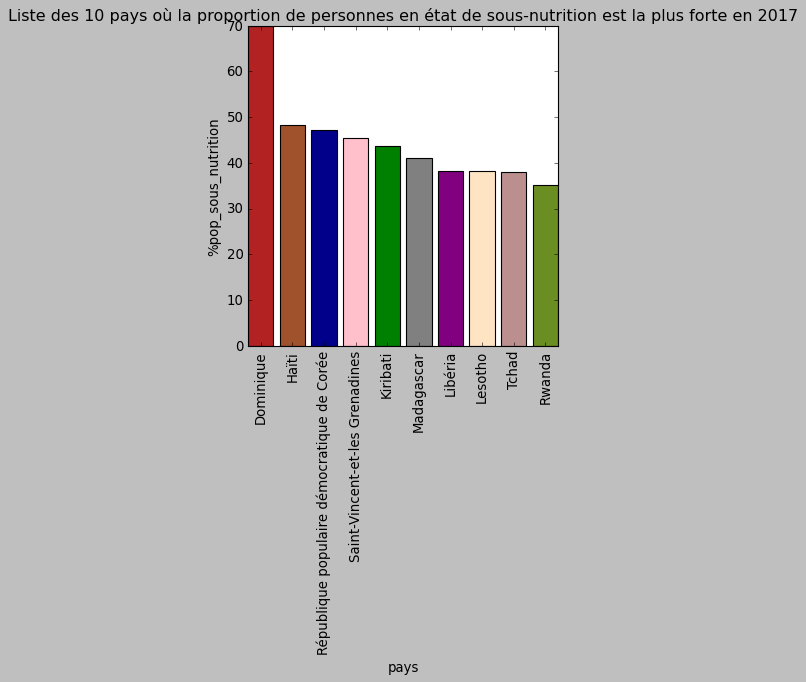

In [546]:
plt.figure(figsize=(5,5))
plt.style.use('classic')
colors =  ['firebrick','sienna', 'darkblue', 'pink', 'green', 'gray', 'purple' ,'bisque', 'rosybrown','olivedrab']
plt.bar(height = df['%pop_sous_nutrition'], x = df['Zone'], color = colors, label = ['Haïti', "REP. populaire démocratique de Corée", 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Mozambique', 'Timor-Leste', 'Afghanistan'])
plt.title('Liste des 10 pays où la proportion de personnes en état de sous-nutrition est la plus forte en 2017')
plt.xticks( rotation = 90)
plt.xlabel('pays')
plt.ylabel('%pop_sous_nutrition')
plt.savefig('ici.png')






In [536]:
# Pays ayant  le plus beneficie d aides alimentaires depuis 2013

aide_alimentaire_2013 = aide_alimentaire_2013.sort_values('Aides_en_kg', ascending = False)
aide_alimentaire_2013.head(10)

,Aides_en_kg
Zone,
Éthiopie,591404000
République arabe syrienne,563566000
Soudan,330230000
Yémen,264764000
Kenya,220966000
Soudan du Sud,196330000
République démocratique du Congo,150320000
Somalie,139800000
Bangladesh,131018000


In [537]:
df_1 = aide_alimentaire_2013.head(10)
df_1.head(10)
df_1.shape
df_1 = df_1.reset_index()
df_1.rename(columns = {'index': 'Zone'})


               

,Zone,Aides_en_kg
0,Éthiopie,591404000
1,République arabe syrienne,563566000
2,Soudan,330230000
3,Yémen,264764000
4,Kenya,220966000
5,Soudan du Sud,196330000
6,République démocratique du Congo,150320000
7,Somalie,139800000
8,Bangladesh,131018000
9,Afghanistan,128238000


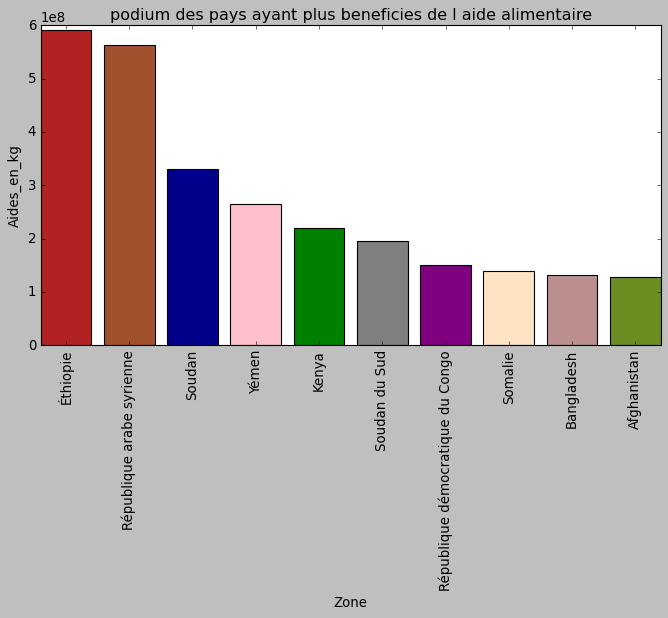

In [547]:
plt.figure(figsize=(10,5))
plt.style.use('classic')
colors =  ['firebrick','sienna', 'darkblue', 'pink', 'green', 'gray', 'purple' ,'bisque', 'rosybrown','olivedrab']
plt.bar(height = df_1['Aides_en_kg'], x = df_1['Zone'], color = colors, label = ['Éthiopie', 'République arabe syrienne', 'Yémen',])
plt.title('podium des pays ayant plus beneficies de l aide alimentaire')
plt.xticks( rotation = 90)
plt.xlabel('Zone')
plt.ylabel('Aides_en_kg')
plt.savefig('beneficiare.png')


In [539]:
# liste des 10 Pays avec la plus forte dispo alimentaire par habitant


In [540]:
dispo_alimentaire_zone = dispo_alimentaire_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)
dispo_alimentaire_zone.head(10)
df_2 = dispo_alimentaire_zone.head(10)
df_2.head(10)


,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3.412000e+09,1.001000e+09,3770.0,1069.20,170.44,106.20,1.930800e+16,6.733000e+09,8.463000e+09,9.085000e+09,4.590000e+08,1.812900e+10,1.730000e+08,5.178000e+09,-5.560000e+08
Belgique,5.533000e+09,3.226000e+09,3737.0,1002.09,161.95,99.37,2.935800e+16,3.034500e+10,3.527600e+10,1.113400e+10,5.640000e+08,2.449600e+10,1.530000e+08,8.960000e+09,-6.400000e+07
Turquie,1.775000e+10,3.006000e+09,3708.0,968.15,119.64,108.12,1.313770e+17,1.459300e+10,1.213600e+10,7.255100e+10,1.203600e+10,1.374320e+11,2.553000e+09,2.356000e+10,-3.599000e+09
États-Unis d'Amérique,1.484320e+11,1.546990e+11,3682.0,1002.39,161.37,109.42,7.779920e+17,1.635240e+11,8.188700e+10,3.208890e+11,7.162000e+09,8.946680e+11,1.040300e+10,1.410100e+11,-3.503200e+10
Israël,2.525000e+09,8.010000e+08,3610.0,922.14,151.39,128.00,1.126700e+16,1.648000e+09,5.883000e+09,7.132000e+09,2.200000e+08,6.906000e+09,7.100000e+07,5.640000e+08,1.280000e+08
Irlande,3.758000e+09,1.120000e+09,3602.0,1150.15,125.69,109.91,1.073800e+16,6.828000e+09,6.254000e+09,5.320000e+09,2.360000e+08,1.150100e+10,8.900000e+07,3.990000e+08,-1.920000e+08
Italie,1.614400e+10,3.228000e+09,3578.0,993.20,154.69,108.49,9.740500e+16,2.364300e+10,3.869200e+10,6.058400e+10,1.861000e+09,8.085500e+10,7.360000e+08,1.487000e+10,1.496000e+09
Luxembourg,1.470000e+08,1.100000e+07,3540.0,1150.66,141.49,113.64,8.020000e+14,8.210000e+08,1.076000e+09,6.070000e+08,1.100000e+07,5.930000e+08,9.000000e+06,2.400000e+07,-4.100000e+07
Égypte,1.508400e+10,2.262000e+09,3518.0,803.79,63.09,103.22,1.151330e+17,5.014000e+09,2.410000e+10,6.595700e+10,7.608000e+09,9.584800e+10,1.365000e+09,2.292400e+10,1.990000e+08


In [541]:
df_2 = dispo_alimentaire_zone.head(10)
df_2.head(10)
df_1.shape
df_2 = df_2.reset_index()
df_2.rename(columns = {'index': 'Zone'})


,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Autriche,3.412000e+09,1.001000e+09,3770.0,1069.20,170.44,106.20,1.930800e+16,6.733000e+09,8.463000e+09,9.085000e+09,4.590000e+08,1.812900e+10,1.730000e+08,5.178000e+09,-5.560000e+08
1,Belgique,5.533000e+09,3.226000e+09,3737.0,1002.09,161.95,99.37,2.935800e+16,3.034500e+10,3.527600e+10,1.113400e+10,5.640000e+08,2.449600e+10,1.530000e+08,8.960000e+09,-6.400000e+07
2,Turquie,1.775000e+10,3.006000e+09,3708.0,968.15,119.64,108.12,1.313770e+17,1.459300e+10,1.213600e+10,7.255100e+10,1.203600e+10,1.374320e+11,2.553000e+09,2.356000e+10,-3.599000e+09
3,États-Unis d'Amérique,1.484320e+11,1.546990e+11,3682.0,1002.39,161.37,109.42,7.779920e+17,1.635240e+11,8.188700e+10,3.208890e+11,7.162000e+09,8.946680e+11,1.040300e+10,1.410100e+11,-3.503200e+10
4,Israël,2.525000e+09,8.010000e+08,3610.0,922.14,151.39,128.00,1.126700e+16,1.648000e+09,5.883000e+09,7.132000e+09,2.200000e+08,6.906000e+09,7.100000e+07,5.640000e+08,1.280000e+08
5,Irlande,3.758000e+09,1.120000e+09,3602.0,1150.15,125.69,109.91,1.073800e+16,6.828000e+09,6.254000e+09,5.320000e+09,2.360000e+08,1.150100e+10,8.900000e+07,3.990000e+08,-1.920000e+08
6,Italie,1.614400e+10,3.228000e+09,3578.0,993.20,154.69,108.49,9.740500e+16,2.364300e+10,3.869200e+10,6.058400e+10,1.861000e+09,8.085500e+10,7.360000e+08,1.487000e+10,1.496000e+09
7,Luxembourg,1.470000e+08,1.100000e+07,3540.0,1150.66,141.49,113.64,8.020000e+14,8.210000e+08,1.076000e+09,6.070000e+08,1.100000e+07,5.930000e+08,9.000000e+06,2.400000e+07,-4.100000e+07
8,Égypte,1.508400e+10,2.262000e+09,3518.0,803.79,63.09,103.22,1.151330e+17,5.014000e+09,2.410000e+10,6.595700e+10,7.608000e+09,9.584800e+10,1.365000e+09,2.292400e+10,1.990000e+08
9,Allemagne,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+17,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08


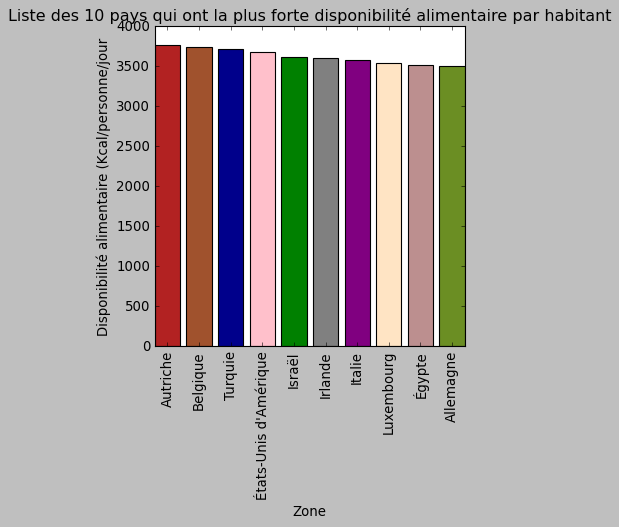

In [542]:
plt.figure(figsize=(5,5))
plt.style.use('classic')
colors =  ['firebrick','sienna', 'darkblue', 'pink', 'green', 'gray', 'purple' ,'bisque', 'rosybrown','olivedrab']
plt.bar(height = df_2['Disponibilité alimentaire (Kcal/personne/jour)'], x = df_2['Zone'], color = colors, label = ['Autriche', 'Belgique', 'Turquie', 'États-Unis dAmérique', 'Israël', 'Irlande', 'Italie', 'Luxembourg', 'Égypte', 'Allemagne'])
plt.title('Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant')
plt.xticks( rotation = 90)
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour')
plt.savefig('B.png')


In [543]:
# Pays avec la plus faible dispo alimentaire par habitant


In [544]:
dispo_alimentaire_zone = dispo_alimentaire_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)
dispo_alimentaire_zone.head(10)
df_3 = dispo_alimentaire_zone.head(10)
df_3.head(10)
df_3 = df_3.reset_index()
df_3.rename(columns = {'index': 'Zone'})
df_3.head(10)



,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,République centrafricaine,1000000.0,2.700000e+07,1879.0,453.73,59.41,46.04,2.582000e+15,0.000000e+00,7.600000e+07,2.092000e+09,1.220000e+08,2.503000e+09,63000000.0,2.780000e+08,3.000000e+06
1,Zambie,408000000.0,6.900000e+07,1924.0,350.12,42.05,55.22,1.004100e+16,6.750000e+08,3.800000e+08,5.088000e+09,2.420000e+08,1.052600e+10,76000000.0,4.178000e+09,-1.820000e+08
2,Madagascar,842000000.0,2.522000e+09,2056.0,425.07,24.49,46.69,1.521600e+16,2.360000e+08,9.240000e+08,9.741000e+09,9.660000e+08,1.416000e+10,375000000.0,8.440000e+08,3.750000e+08
3,Afghanistan,768000000.0,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+16,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,395000000.0,6.300000e+07,-3.680000e+08
4,Haïti,481000000.0,1.150000e+08,2089.0,397.78,48.92,47.70,6.175000e+15,1.500000e+07,1.204000e+09,4.101000e+09,6.790000e+08,5.072000e+09,36000000.0,7.620000e+08,-7.700000e+07
5,République populaire démocratique de Corée,816000000.0,6.950000e+08,2093.0,458.93,36.41,54.99,1.487600e+16,8.300000e+07,9.930000e+08,1.142500e+10,1.066000e+09,1.388300e+10,194000000.0,6.780000e+08,8.400000e+07
6,Tchad,104000000.0,2.000000e+06,2109.0,319.45,47.10,62.75,5.304000e+15,0.000000e+00,2.900000e+08,4.097000e+09,4.590000e+08,5.153000e+09,101000000.0,5.420000e+08,-1.410000e+08
7,Zimbabwe,131000000.0,2.300000e+07,2113.0,336.59,57.18,48.32,9.507000e+15,2.780000e+08,1.342000e+09,4.762000e+09,1.880000e+08,7.914000e+09,76000000.0,4.330000e+09,5.310000e+08
8,Ouganda,348000000.0,6.800000e+07,2126.0,535.58,46.57,52.64,2.662400e+16,1.218000e+09,1.257000e+09,2.012100e+10,9.910000e+08,2.632100e+10,154000000.0,4.982000e+09,2.690000e+08
9,Éthiopie,685000000.0,3.641000e+09,2129.0,354.55,25.89,60.39,4.401400e+16,9.410000e+08,1.711000e+09,3.336100e+10,2.256000e+09,4.610200e+10,640000000.0,3.443000e+09,-2.857000e+09


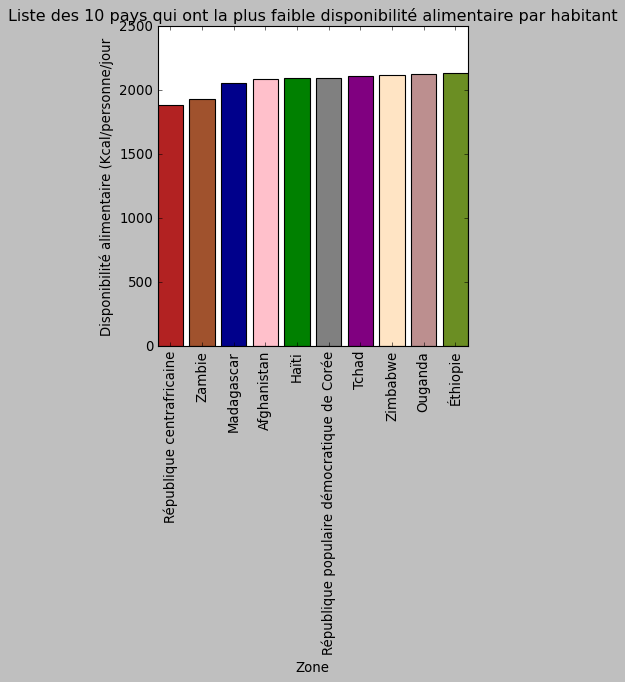

In [545]:
plt.figure(figsize=(5,5))
plt.style.use('classic')
colors =  ['firebrick','sienna', 'darkblue', 'pink', 'green', 'gray', 'purple' ,'bisque', 'rosybrown','olivedrab']
plt.bar(height = df_3['Disponibilité alimentaire (Kcal/personne/jour)'], x = df_3['Zone'], color = colors, label = ['République centrafricaine', 'Zambie', 'Madagascar', 'Afghanistan', 'Haïti', 'République populaire démocratique de Corée', 'Tchad', 'Zimbabwe', 'Ouganda', 'Éthiopie' ])
plt.title('Liste des 10 pays qui ont la plus faible disponibilité alimentaire par habitant')
plt.xticks( rotation = 90)
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour')
plt.savefig('C.png')